## 1) Copy the notebook to your google account.

## 2) Import the pandas library and alias it as "pd".

In [0]:
import pandas as pd

## 3) Read in the CSV dataset that is found at the following URL:
[DATASET HERE](https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv)


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/messy-data.csv")

## 4) Print out the shape as well as the first 5 rows of the dataframe.

In [0]:
print(df.shape)
print(df.head(5))

(165, 7)
   alpha  beta  gamma  delta  epsilon zeta eta
0      2    48     12    240      3.0  Yes  AZ
1      3    46     18    230      5.0  NaN  VT
2      4    44     24    220      7.0   No  PA
3      5    42     30    210      9.0  Yes  OK
4      6    44     36    220     11.0  Yes  MD


## 5) Print out the datatypes of the dataframe columns (dataset features).

In [0]:
print(df.dtypes)

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta        object
eta         object
dtype: object


## 6) Print out the summary statistics of the numeric values of your dataset i.e. min, max, mean, standard deviation, etc.

In [0]:
print(df.describe())

            alpha        beta       gamma       delta     epsilon
count  165.000000  165.000000  165.000000  165.000000  141.000000
mean    46.169697   17.921212  277.018182   89.606061  164.794326
std     24.371521   17.769180  146.229125   88.845900   96.430843
min      2.000000  -11.000000   12.000000  -55.000000    3.000000
25%     28.000000    7.000000  168.000000   35.000000   83.000000
50%     44.000000   15.000000  264.000000   75.000000  163.000000
75%     65.000000   32.000000  390.000000  160.000000  247.000000
max     85.000000   50.000000  510.000000  250.000000  331.000000


## 6) Clean all NaN values from the dataset.

Feel free to add code cells as needed.

In [0]:
import numpy as np

print(df.isnull().any())
# dataframe has null values in epsilon and zeta columns

null_counts = df.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False))
# 24 in epsilon, 19 in zeta

alpha      False
beta       False
gamma      False
delta      False
epsilon     True
zeta        True
eta        False
dtype: bool
epsilon    24
zeta       19
dtype: int64


In [0]:
# epsilon has some NaN values
# we'll take the average of the values before and after NaN
# and fill it with those values since it looks like
# they are increments of 2.0 each row
print(df[df['epsilon'].isnull() == True])

     alpha  beta  gamma  delta  epsilon zeta eta
9        5    38     30    190      NaN   No  DE
18      12    37     72    185      NaN  Yes  NM
24      17    32    102    160      NaN  Yes  VT
26      19    37    114    185      NaN   No  TX
32      23    47    138    235      NaN  Yes  UT
54      32     9    192     45      NaN   No  DE
60      36    22    216    110      NaN   No  TX
67      42    27    252    135      NaN   No  CT
72      43    25    258    125      NaN  Yes  MN
74      43    21    258    105      NaN  Yes  OH
83      40     9    240     45      NaN   No  CA
90      50    18    300     90      NaN  Yes  MS
95      54    10    324     50      NaN   No  WV
98      56    16    336     80      NaN  NaN  NY
107     62     7    372     35      NaN   No  WV
113     63     3    378     15      NaN  Yes  WV
119     63    -9    378    -45      NaN  Yes  NE
124     64   -11    384    -55      NaN   No  NJ
126     66   -11    396    -55      NaN  NaN  FL
134     76     7    

In [0]:
# missing value on index 9, should be 21.0
print(df['epsilon'].head(10))

0     3.0
1     5.0
2     7.0
3     9.0
4    11.0
5    13.0
6    15.0
7    17.0
8    19.0
9     NaN
Name: epsilon, dtype: float64


In [0]:
# missing value on 162nd index, should be 327.0
print(df['epsilon'].tail(10))

155    313.0
156    315.0
157    317.0
158    319.0
159    321.0
160    323.0
161    325.0
162      NaN
163    329.0
164    331.0
Name: epsilon, dtype: float64


In [0]:
# make a copy of dataset so we don't overwrite original
dfcopy = df.copy()
# fill na values with zeroes
dfcopy['epsilon'] = dfcopy['epsilon'].fillna(0)
# becomes floats 0.0

In [0]:
# looping until i hits maximum row count
for i in range(dfcopy['epsilon'].shape[0]):
  # if value is 0.0
  if dfcopy['epsilon'].iloc[i] == 0.0:
    # replace by taking average of value before and after 0.0's
    dfcopy['epsilon'].iloc[i] = (dfcopy['epsilon'].iloc[i-1] + dfcopy['epsilon'].iloc[i+1]) / 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# expected output should be increments of 2.0
# index 9 is 21.0
dfcopy['epsilon'].head(10)

0     3.0
1     5.0
2     7.0
3     9.0
4    11.0
5    13.0
6    15.0
7    17.0
8    19.0
9    21.0
Name: epsilon, dtype: float64

In [0]:
# checking last 10 values
dfcopy['epsilon'].tail(10)

155    313.0
156    315.0
157    317.0
158    319.0
159    321.0
160    323.0
161    325.0
162    327.0
163    329.0
164    331.0
Name: epsilon, dtype: float64

In [0]:
# check to see if there are any null or 0.0 values left
print(dfcopy[dfcopy['epsilon'].isnull() == True])
print(dfcopy[dfcopy['epsilon'] == 0.0])
# so far so good

Empty DataFrame
Columns: [alpha, beta, gamma, delta, epsilon, zeta, eta]
Index: []
Empty DataFrame
Columns: [alpha, beta, gamma, delta, epsilon, zeta, eta]
Index: []


In [0]:
# printing indexes of null values for zeta
print(dfcopy[dfcopy['zeta'].isnull() == True])

     alpha  beta  gamma  delta  epsilon zeta eta
1        3    46     18    230      5.0  NaN  VT
16      12    43     72    215     35.0  NaN  OH
29      18    47    108    235     62.0  NaN  SD
40      27    33    162    165     83.0  NaN  MD
52      30    12    180     60    107.0  NaN  MT
62      36    24    216    120    127.0  NaN  OR
71      46    27    276    135    145.0  NaN  TN
79      43    11    258     55    161.0  NaN  WY
89      50    21    300    105    181.0  NaN  MI
98      56    16    336     80    199.0  NaN  NY
115     63    -1    378     -5    233.0  NaN  PA
122     61   -11    366    -55    247.0  NaN  WI
126     66   -11    396    -55    255.0  NaN  FL
133     75     7    450     35    269.0  NaN  CT
135     77     7    462     35    273.0  NaN  CT
141     74    -1    444     -5    285.0  NaN  AK
144     74    -7    444    -35    291.0  NaN  DE
147     83     7    498     35    297.0  NaN  KY
159     84     2    504     10    321.0  NaN  MI


In [0]:
# null value found on index 1
print(dfcopy['zeta'].head(10))

0    Yes
1    NaN
2     No
3    Yes
4    Yes
5     No
6    Yes
7     No
8    Yes
9     No
Name: zeta, dtype: object


In [0]:
# index 159
print(dfcopy['zeta'].tail(10))

155    Yes
156    Yes
157    Yes
158     No
159    NaN
160    Yes
161    Yes
162     No
163    Yes
164    Yes
Name: zeta, dtype: object


In [0]:
# now we will replace null values with zeroes
# then replace them again with 'No' values
dfcopy['zeta'] = dfcopy['zeta'].fillna(0)

In [0]:
for i in range(dfcopy['zeta'].shape[0]):
  if dfcopy['zeta'].iloc[i] == 0:
    # replace by taking average of value before and after 0.0's
    dfcopy['zeta'].iloc[i] = 'No'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# checking to see if there are any nulls or 0
print(dfcopy[dfcopy['zeta'].isnull() == True])
print(dfcopy[dfcopy['zeta'] == 0])

Empty DataFrame
Columns: [alpha, beta, gamma, delta, epsilon, zeta, eta]
Index: []
Empty DataFrame
Columns: [alpha, beta, gamma, delta, epsilon, zeta, eta]
Index: []


In [0]:
print(dfcopy['zeta'].head(10))

0    Yes
1     No
2     No
3    Yes
4    Yes
5     No
6    Yes
7     No
8    Yes
9     No
Name: zeta, dtype: object


In [0]:
print(dfcopy['zeta'].tail(10))

155    Yes
156    Yes
157    Yes
158     No
159     No
160    Yes
161    Yes
162     No
163    Yes
164    Yes
Name: zeta, dtype: object


In [0]:
# final check
null_counts_copy = dfcopy.isnull().sum()
print(null_counts_copy[null_counts_copy > 0].sort_values(ascending=False))

Series([], dtype: int64)


## 6.1) Describe how you addressed the NaN values and give an explanation justifying your decision.

In [0]:
# For the NaN values in epsilon, there seems to be a trend of incrementing each value by 2.0.
# To fill the columns with their respective value, I replaced all NaN's with 0's and then replaced those by finding the average of the previous and after values.
# As for the values in zeta, they only consisted of Yes or No.
# Assuming the dataset would be some sort of questionnaire, if the respondent did not leave a reply of Yes or No, I assumed to replace them with No.
# It is better to have a working dataset rather than one with a few missing rows since there doesn't seem to be that many important missing values to begin with.

## 7) Create scatter plots using Matplotlib. Can you find any interesting relationships in the data? Be sure to label your axis and to give your graphs a title.

Screenshot cool graphs that you create and share them with the slack channel. 

Don't forget to import matplotlib before trying to use it.

Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta'], dtype='object')


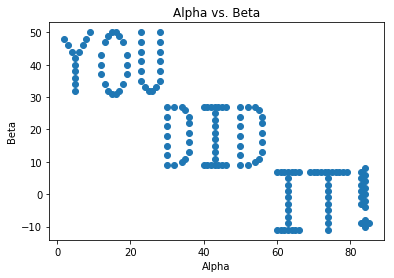

In [0]:
print(dfcopy.columns)
import matplotlib.pyplot as plt

plt.scatter(dfcopy['alpha'], dfcopy['beta'])
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Alpha vs. Beta')
plt.show()

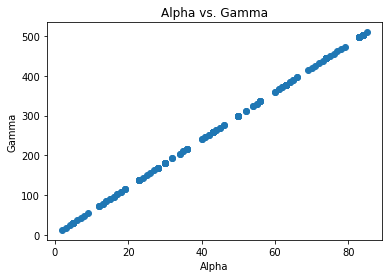

In [0]:
plt.scatter(dfcopy['alpha'], dfcopy['gamma'])
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Alpha vs. Gamma')
plt.show()

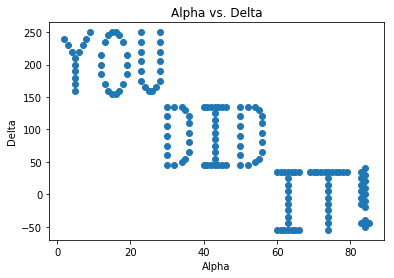

In [0]:
plt.scatter(dfcopy['alpha'], dfcopy['delta'])
plt.xlabel('Alpha')
plt.ylabel('Delta')
plt.title('Alpha vs. Delta')
plt.show()

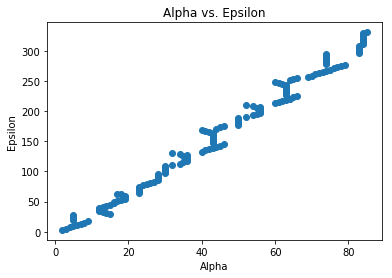

In [0]:
plt.scatter(dfcopy['alpha'], dfcopy['epsilon'])
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.title('Alpha vs. Epsilon')
plt.show()

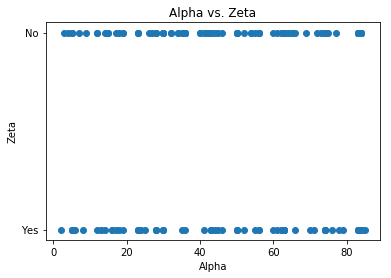

In [0]:
plt.scatter(dfcopy['alpha'], dfcopy['zeta'])
plt.xlabel('Alpha')
plt.ylabel('Zeta')
plt.title('Alpha vs. Zeta')
plt.show()

## 8) STRETCH GOAL (Extra Credit)

Machine Learning algorithms don't do well with categorical values that are represented by strings. In order to have this dataset completely cleaned we need to transform the categorical variables that are represented as strings into numeric categorical variables

- **Turn all categorical features (columns) into numeric features**

Hints:

[Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[Pandas Docs - Working with Categorical Data](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

[Guide to Encoding Categorical Variables in Python](http://pbpython.com/categorical-encoding.html)

In [0]:
print(dfcopy.dtypes)

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta        object
eta         object
dtype: object


In [0]:
print(dfcopy['zeta'].value_counts())

No     93
Yes    72
Name: zeta, dtype: int64


In [0]:
# since zeta and eta are both objects, we need to give them numerical values
# zeta consists of yes/no values, we will convert yes to 1, no to 0
# we can use the ord() function to transform their values to numerical
# by adding both ord() letters together
for i in range(dfcopy['zeta'].shape[0]):
  if dfcopy['zeta'].iloc[i] == 'Yes':
    dfcopy['zeta'].iloc[i] = 1
  if dfcopy['zeta'].iloc[i] == 'No':
    dfcopy['zeta'].iloc[i] = 0

print(dfcopy['zeta'].value_counts())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    93
1    72
Name: zeta, dtype: int64


In [0]:
# converting zeta column to int and checking
dfcopy['zeta'] = dfcopy['zeta'].astype(int)
print(dfcopy['zeta'].dtypes)

int64


In [0]:
# create two lists to hold first and second ord(letter)
# sum up lists and replace values
lst1 = []
lst2 = []
for i in range(dfcopy['eta'].shape[0]):
  lst1.append(ord(dfcopy['eta'].iloc[i][0]))
  lst2.append(ord(dfcopy['eta'].iloc[i][1]))
  
dfcopy['eta'] = np.add(lst1, lst2)

In [0]:
# checking first 10 values
print(dfcopy['eta'].head(10))

0    155
1    170
2    145
3    154
4    145
5    151
6    141
7    147
8    136
9    137
Name: eta, dtype: int64


In [0]:
# checking last 10 values
print(dfcopy['eta'].tail(10))

155    156
156    141
157    140
158    155
159    150
160    141
161    150
162    152
163    141
164    152
Name: eta, dtype: int64


In [0]:
# checking column to see if it is still an object
print(dfcopy['eta'].dtypes)

int64


In [0]:
# checking all column dtypes
print(dfcopy.dtypes)

alpha        int64
beta         int64
gamma        int64
delta        int64
epsilon    float64
zeta         int64
eta          int64
dtype: object
